In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import sklearn
from matplotlib import cm
import ast
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
import matplotlib.style as style 

CB_color = {"red":"#DC267F", 
            "blue": '#648FFF', 
            "yellow": '#FFB000'}

In [23]:
df_full = pd.read_csv('full_model_performance.csv', index_col='folder_id')
df_minus_resnet = pd.read_csv('minus_resnet_performance.csv', index_col='folder_id')
df_minus_layoutlm = pd.read_csv('minus_layoutlm_performance.csv', index_col='folder_id')
baseline = pd.read_csv("baseline_model_performance.csv", index_col = "folder_id")
df_full.index = df_full.index.astype(int)
df_minus_resnet.index = df_minus_resnet.index.astype(int)
df_minus_layoutlm.index = df_minus_layoutlm.index.astype(int)
baseline.index = baseline.index.astype(int)

full_model_predictions = pd.read_csv("../predictions/full_model_predictions_test.csv")
minus_resnet_predictions = pd.read_csv("../predictions/minus_resnet_predictions_test.csv")
minus_layoutlm_predictions = pd.read_csv("../predictions/minus_layoutlm_predictions_test.csv")

In [24]:
df_full = pd.merge(df_full, baseline, left_index=True, right_index=True)

In [25]:
max_num_pages = full_model_predictions['merged_num_of_pages'].max()
num_folder = df_full.shape[0]

# Experiment 1: F1 vs pages per folder

In [26]:
df_full["merged_num_of_pages"] = full_model_predictions[["folder_id", "merged_num_of_pages"]].drop_duplicates().set_index("folder_id")["merged_num_of_pages"]
df_full

,label_x,model_pred,model_F1,model_precision,model_recall,model_MNDD,label_y,onlyfirst_pred,onlyfirst_F1,onlyfirst_precision,onlyfirst_recall,random_pred,random_F1,random_precision,random_recall,merged_num_of_pages
folder_id,,,,,,,,,,,,,,,,
1,"[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, ...","[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",0.923077,0.857143,1.000000,2.0,"[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.153846,1.0,0.083333,"[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, ...",0.727273,0.800000,0.666667,19
2,"[1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, ...","[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.000000,1.000000,1.000000,0.0,"[1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.181818,1.0,0.100000,"[1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, ...",0.526316,0.555556,0.500000,21
3,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",1.000000,1.000000,1.000000,0.0,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.166667,1.0,0.090909,"[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]",0.736842,0.875000,0.636364,12
4,"[1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0]","[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...",0.941176,1.000000,0.888889,1.0,"[1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.200000,1.0,0.111111,"[0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0]",0.555556,0.555556,0.555556,16
5,"[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",1.000000,1.000000,1.000000,0.0,"[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.400000,1.0,0.250000,"[1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]",0.363636,0.285714,0.500000,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,"[1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...",0.933333,0.875000,1.000000,2.0,"[1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.133333,1.0,0.071429,"[1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.714286,0.714286,0.714286,29
4997,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.000000,1.000000,1.000000,0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.166667,1.0,0.090909,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, ...",0.521739,0.500000,0.545455,29
4998,"[1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...",0.800000,0.714286,0.909091,5.0,"[1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.166667,1.0,0.090909,"[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.476190,0.500000,0.454545,25


In [27]:
f1_full = []
f1_onlyfirst = []
f1_random = []
all_num_pages_folder = list(df_full.merged_num_of_pages.unique())
for num_pages_folder in all_num_pages_folder:
  f1_full.append(df_full.loc[df_full.merged_num_of_pages==num_pages_folder, 'model_F1'].mean())
  f1_onlyfirst.append(df_full.loc[df_full.merged_num_of_pages==num_pages_folder, 'onlyfirst_F1'].mean())
  f1_random.append(df_full.loc[df_full.merged_num_of_pages==num_pages_folder, 'random_F1'].mean())

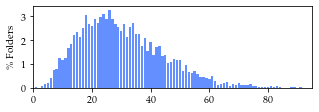

In [28]:
# number of folder vs page position, most folders run out out length before page position 60
plt.figure(figsize=(5,1.5))
count = df_full.value_counts('merged_num_of_pages')
plt.bar(count.index, count.to_numpy()/count.sum()*100, color=[CB_color["blue"]])
plt.xlim((0,95))
# plt.xlabel('Page position')
plt.ylabel('\% Folders')
plt.savefig("figs/histogram_folder_length.pdf", bbox_inches='tight', pad_inches=0)

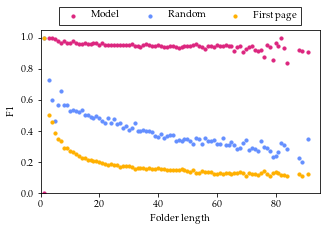

In [29]:
fig, ax = plt.subplots(1,1, figsize=(5,3))
ax.scatter(all_num_pages_folder, f1_full, c=CB_color["red"], label='Model', s=10)
ax.scatter(all_num_pages_folder, f1_random, c=CB_color["blue"], label='Random', s=10)
ax.scatter(all_num_pages_folder, f1_onlyfirst, c=CB_color["yellow"], label='First page', s=10)
# ax.fill_between((0,95), 0.75, 1.01, facecolor='green', alpha=0.1)
ax.set_xlim((0, 95))
ax.set_ylim((0, 1.05))
ax.set_ylabel("F1")
ax.set_xlabel("Folder length")
# ax.legend(loc='lower left')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.17), ncol=3, edgecolor='k', fancybox=False)
        #   fancybox=True, ncol=5)
plt.savefig('figs/f1_vs_folder_length.pdf', bbox_inches='tight', pad_inches=0)
# ax.grid(visible=True, which='minor', linewidth=0.5, linestyle='--')
# ax.minorticks_on()

# Experiment 2: **F1 vs page position**

In [30]:
# prediction arrays: horizontal axis (axis=1) indicates page position, vertical axis (axis=0) indicates folder_id
# prediction=-1 means folder shorter than that page position
base = np.ones((num_folder,max_num_pages))*-1
label = np.ones((num_folder,max_num_pages))*-1
pred_full = np.ones((num_folder,max_num_pages))*-1
pred_random = np.ones((num_folder,max_num_pages))*-1
pred_first = np.ones((num_folder,max_num_pages))*-1

In [31]:
df_full['label'] = df_full['label_x'].apply(ast.literal_eval)
df_full['num_positive'] = df_full['label'].apply(sum)
df_full['random_pred'] = df_full['random_pred'].map(ast.literal_eval)
df_full['onlyfirst_pred'] = df_full['onlyfirst_pred'].map(ast.literal_eval)
full_model_predictions['folder_id'] = full_model_predictions['folder_id'].astype('int')

In [32]:
label = np.ones((num_folder,max_num_pages))*-1
pred_full = np.ones((num_folder,max_num_pages))*-1
pred_random = np.ones((num_folder,max_num_pages))*-1
pred_onlyfirst = np.ones((num_folder,max_num_pages))*-1
for folder_id in full_model_predictions['folder_id'].unique():
  df_one_folder = full_model_predictions.loc[full_model_predictions.folder_id==folder_id]
  for i, page in enumerate(df_one_folder.iterrows()):
    label[folder_id-1, i] = page[1].label
    pred_full[folder_id-1, i] = page[1].prediction
    pred_random[folder_id-1, i] = df_full.loc[folder_id, 'random_pred'][i]
    pred_onlyfirst[folder_id-1, i] = df_full.loc[folder_id, 'onlyfirst_pred'][i]

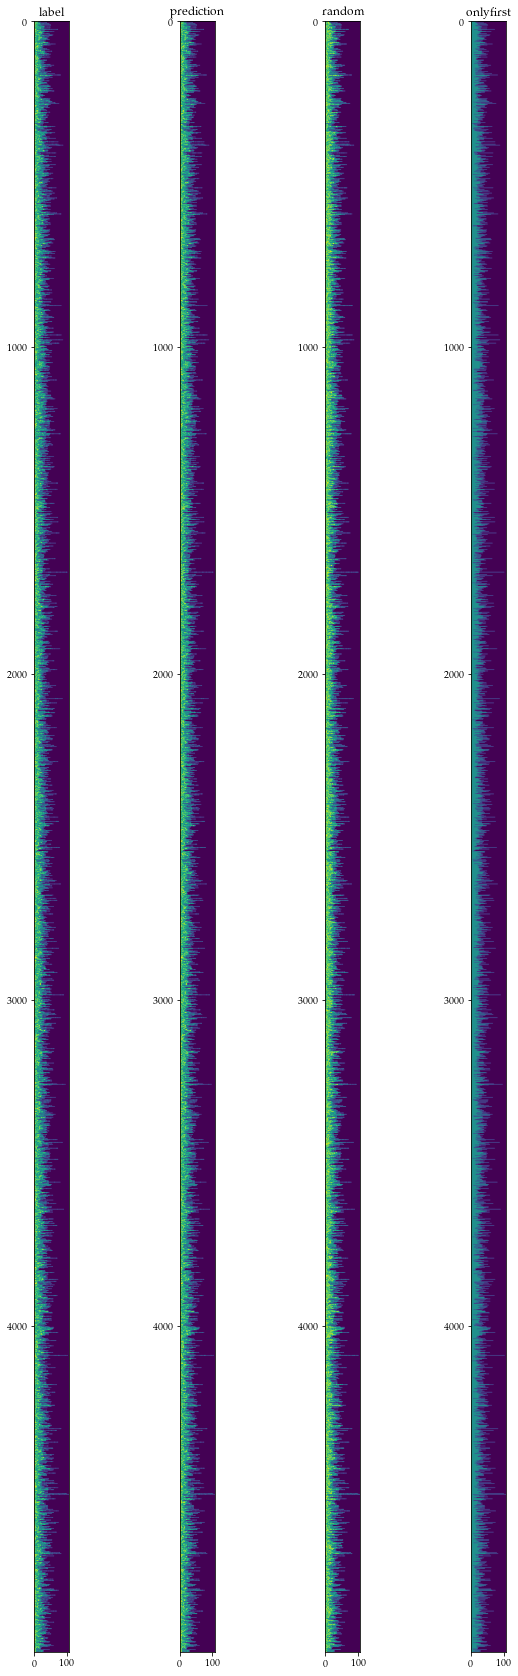

In [33]:
# predictions: yello=1 green=0, purple=-1
fig, ax = plt.subplots(1, 4, figsize=(10,30))
ax[0].imshow(label)
ax[0].set_title('label')
ax[1].imshow(pred_full)
ax[1].set_title('prediction')
ax[2].imshow(pred_random)
ax[2].set_title('random')
ax[3].imshow(pred_onlyfirst)
ax[3].set_title('onlyfirst')
plt.show()

In [34]:
f1_full_page_position = np.zeros((max_num_pages))
f1_random_page_position = np.zeros((max_num_pages))
f1_onlyfirst_page_position = np.zeros((max_num_pages))

num_items = np.zeros((max_num_pages))

# calculate f1 in each position
for position in range(max_num_pages):
  label_ = label[:, position]
  pred_full_ = pred_full[:, position]
  # filter out some folders that run out of length (contains index -1)
  label_filtered = label_[label_!=-1]
  pred_full_filtered = pred_full_[label_!=-1]
  precision, recall, f1, _ = precision_recall_fscore_support(label_filtered, pred_full_filtered, average='binary')
  assert label_filtered.shape[0] == pred_full_filtered.shape[0]
  num_items[position] = label_filtered.shape[0]
  f1_full_page_position[position] = f1

for position in range(max_num_pages):
  label_ = label[:, position]
  pred_random_ = pred_random[:, position]
  # filter out some folders that run out of length (contains index -1)
  label_filtered = label_[label_!=-1]
  pred_random_filtered = pred_random_[label_!=-1]
  precision, recall, f1, _ = precision_recall_fscore_support(label_filtered, pred_random_filtered, average='binary')
  assert label_filtered.shape[0] == pred_random_filtered.shape[0]
  num_items[position] = label_filtered.shape[0]
  f1_random_page_position[position] = f1

for position in range(max_num_pages):
  label_ = label[:, position]
  pred_onlyfirst_ = pred_onlyfirst[:, position]
  # filter out some folders that run out of length (contains index -1)
  label_filtered = label_[label_!=-1]
  pred_onlyfirst_filtered = pred_onlyfirst_[label_!=-1]
  precision, recall, f1, _ = precision_recall_fscore_support(label_filtered, pred_onlyfirst_filtered, average='binary')
  assert label_filtered.shape[0] == pred_onlyfirst_filtered.shape[0]
  num_items[position] = label_filtered.shape[0]
  f1_onlyfirst_page_position[position] = f1

/home/giftbear/miniconda3/envs/tabme/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giftbear/miniconda3/envs/tabme/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giftbear/miniconda3/envs/tabme/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giftbear/minico

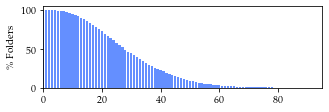

In [35]:
# number of folder vs page position, most folders run out out length before page position 60
plt.figure(figsize=(5,1.5))
plt.bar(np.arange(max_num_pages), num_items/num_items[0]*100, color=CB_color["blue"])
plt.xlim((0,95))
# plt.xlabel('Page position')
plt.ylabel('\% Folders')
plt.savefig("figs/histogram_page_position.pdf", bbox_inches='tight', pad_inches=0)

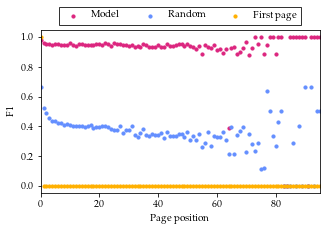

In [36]:
n = max_num_pages
fig, ax = plt.subplots(1, 1, figsize=(5,3))
# n=70
ax.scatter(np.arange(n), f1_full_page_position[:n], c=CB_color["red"], s=10, label='Model')
ax.scatter(np.arange(n), f1_random_page_position[:n], c=CB_color["blue"], s=10, label='Random')
ax.scatter(np.arange(n), f1_onlyfirst_page_position[:n], c=CB_color["yellow"], s=10, label='First page')
ax.set_xlabel("Page position")
ax.set_ylabel("F1")
ax.set_xlim((0,95))

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.17), ncol=3, edgecolor='k', fancybox=False)

plt.savefig("figs/f1_vs_page_position.pdf", bbox_inches='tight', pad_inches=0)

# Experiment 3: F1 against document length

In [37]:
df = full_model_predictions
df["random prediction"] = np.random.randint(2, size=df.shape[0])
df["onlyfirst prediction"] = df.folder_id.diff()
df.loc[0, "onlyfirst prediction"] = 1

# suppose folders are formed WITH replacement
df["label_cumsum"] = df["label"].cumsum().astype(str)
df["id"] = df[['id', 'label_cumsum']].agg('-'.join, axis=1)

# calculation
df = df[['id', 'prediction', 'random prediction', 'onlyfirst prediction']].groupby(['id'], sort=False).apply(
    lambda x: [list(x["prediction"]), list(x["random prediction"]), list(x["onlyfirst prediction"])]).apply(pd.Series)
df.columns = ["prediction", "random prediction", "onlyfirst prediction"]
df["Length of document"] = df["prediction"].map(len)
df["label"] = df["Length of document"].apply(lambda x: [1]+[0 for i in range(x-1)])
df["model"] = df.apply(lambda x: sklearn.metrics.f1_score(x["label"], x["prediction"]), axis=1)
df["random"] = df.apply(lambda x: sklearn.metrics.f1_score(x["label"], x["random prediction"]), axis=1)
df["first page"] = df.apply(lambda x: sklearn.metrics.f1_score(x["label"], x["onlyfirst prediction"]), axis=1)
summary = df.groupby("Length of document").mean().reset_index()

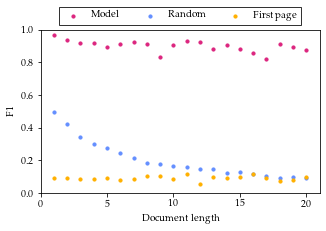

In [38]:
fig, ax = plt.subplots(figsize = (5,3))
ax.scatter(summary["Length of document"], summary["model"], c=CB_color["red"], label='Model', s=10)
ax.scatter(summary["Length of document"], summary["random"], c=CB_color["blue"], label='Random', s=10)
ax.scatter(summary["Length of document"], summary["first page"], c=CB_color["yellow"], label='First page', s=10)
ax.set_xlabel("Document length")
ax.set_ylabel("F1")
ax.set_xlim((0,21))
ax.set_ylim((0,1))
plt.xticks(np.arange(0, 21, step=5))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.17), ncol=3, edgecolor='k', fancybox=False)
plt.savefig("figs/F1 against document length.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
plt.show()

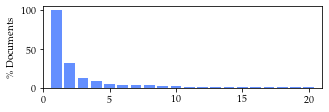

In [39]:
hist = df[["Length of document", "label"]].groupby("Length of document").count().reset_index()
hist["label"] = hist["label"] / max(hist["label"]) * 100
plt.figure(figsize=(5, 1.5))
plt.bar(hist["Length of document"], hist["label"], color=CB_color["blue"])
plt.ylabel("\% Documents")
plt.xlim((0,21))
plt.xticks(np.arange(0, 21, step=5))
plt.savefig("figs/document_length_hist.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
plt.show()